In [1]:
# importing general libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# dataset paths
data_path1 = '../Part_1/Data/data0.npy'
data_path2 = '../Part_1/Data/data1.npy'
data_path3 = '../Part_1/Data/data2.npy'

label_path1 = '../Part_1/Data/lab0.npy'
label_path2 = '../Part_1/Data/lab1.npy'
label_path3 = '../Part_1/Data/lab2.npy'

In [3]:
# loading the dataset
data1 = np.load(data_path1)
data2 = np.load(data_path2)
data3 = np.load(data_path3)

label1 = np.load(label_path1)
label2 = np.load(label_path2)
label3 = np.load(label_path3)

In [4]:
# printing the shape of the data
print('Data1 shape:', data1.shape, 'Label1 shape:', label1.shape)
print('Data2 shape:', data2.shape, 'Label2 shape:', label2.shape)
print('Data3 shape:', data3.shape, 'Label3 shape:', label3.shape)


Data1 shape: (10000, 40, 168) Label1 shape: (10000,)
Data2 shape: (10000, 40, 168) Label2 shape: (10000,)
Data3 shape: (10000, 40, 168) Label3 shape: (10000,)


In [5]:
# combining the datasets into 1
data = np.concatenate((data1, data2, data3), axis=0)
labels = np.concatenate((label1, label2, label3), axis=0)
print('Data shape:', data.shape, 'Labels shape:', labels.shape)

Data shape: (30000, 40, 168) Labels shape: (30000,)


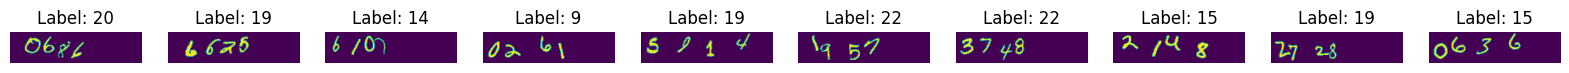

In [6]:
# displaying random images from the dataset
def display_images(data, label, indexes):
    fig, axes = plt.subplots(1, len(indexes), figsize=(20, 20))
    for i, j in enumerate(indexes):
        axes[i].imshow(data[j])
        axes[i].set_title('Label: ' + str(label[j]))
        axes[i].axis('off')
    plt.show()

num_images = 10
indexes = np.random.randint(0, data.shape[0], num_images)
display_images(data, labels, indexes)

In [7]:
# defining the baseline model
import torch 
import torch.nn as nn
import torch.nn.functional as F

class BaselineCNN(nn.Module):
    def __init__(self):
        super(BaselineCNN, self).__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1),  # (40, 168) -> (40, 168)
            nn.ReLU(),
            nn.MaxPool2d(2, 2),  # (40, 168) -> (20, 84)

            nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),  # (20, 84) -> (20, 84)
            nn.ReLU(),
            nn.MaxPool2d(2, 2)   # (20, 84) -> (10, 42)
        )

        self.fc_layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(32 * 10 * 42, 128),  # Fully connected layer
            nn.ReLU(),
            nn.Linear(128, 1)  # Output layer
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = self.fc_layers(x)
        return x

In [8]:
# loading the model
model = BaselineCNN()
model.load_state_dict(torch.load('baseline_model.pth'))

/tmp/ipykernel_1376/2377548669.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('baseline_model.pth'))


<All keys matched successfully>

In [9]:
# calculating the loss of the model
def calculate_loss(model, data, labels):
    criterion = nn.MSELoss()
    with torch.no_grad():
        model.eval()
        running_loss = 0.0
        for i in range(data.shape[0]):
            print(i, end='\r')  
            data_i = torch.tensor(data[i], dtype=torch.float32).unsqueeze(0).unsqueeze(0)
            label_i = torch.tensor(labels[i], dtype=torch.float32).unsqueeze(0)
            output = model(data_i).squeeze(1)
            loss = criterion(output, label_i)
            running_loss += loss.item()
    return running_loss / data.shape[0]

# calculating the loss of the model
loss = calculate_loss(model, data, labels)
print('Loss:', loss)

Loss: 6.945026383576967


In [10]:
# calculating the accuracy of the model
def calculate_accuracy(model, data, labels):
    with torch.no_grad():
        model.eval()
        correct = 0
        for i in range(data.shape[0]):
            print(i, end='\r')  
            data_i = torch.tensor(data[i], dtype=torch.float32).unsqueeze(0).unsqueeze(0)
            label_i = torch.tensor(labels[i], dtype=torch.float32).unsqueeze(0)
            output = model(data_i).squeeze(1)
            if torch.abs(output - label_i) < 0.5:
                correct += 1
    return correct / data.shape[0]

# calculating the accuracy of the model
accuracy = calculate_accuracy(model, data, labels)
print('Accuracy:', accuracy)

Accuracy: 0.16123333333333334


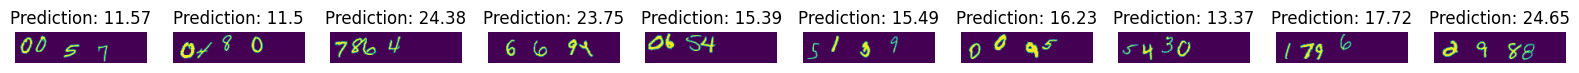

In [11]:
# performing inference on images
def perform_inference(model, data, labels, indexes):
    fig, axes = plt.subplots(1, len(indexes), figsize=(20, 20))
    for i, j in enumerate(indexes):
        image = data[j]
        image = torch.tensor(image).float().unsqueeze(0).unsqueeze(0)
        output = model(image)
        prediction = output.item()
        prediction = int(prediction*100) / 100


        axes[i].imshow(data[j])
        axes[i].set_title('Prediction: ' + str(prediction))
        axes[i].set_xlabel('Label: ' + str(labels[j]))
        axes[i].axis('off')
    plt.show()

num_images = 10
indexes = np.random.randint(0, data.shape[0], num_images)
perform_inference(model, data, labels, indexes  )

